# Importing all needed packages

In [1]:
#Importing required libraries
import os #getting access to input files
import pandas as pd # Importing pandas for performing EDA
import numpy as np  # Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization
from collections import Counter #for counting neccessary fieds
from sklearn.tree import DecisionTreeRegressor #for applying decission tree algorithm
from sklearn.ensemble import RandomForestRegressor #For applying Random forest algorithm
from sklearn.linear_model import LinearRegression #linear regression algorithm
from sklearn.model_selection import train_test_split #splitting dataset


%matplotlib inline

In [2]:
#Setting the working directory

os.chdir("D:\EdwisorDS\Assignment\Project1")
print(os.getcwd())

D:\EdwisorDS\Assignment\Project1


# Loading Data

In [3]:
#Loading the data:
train_cab  = pd.read_csv("train_cab.csv")
test_cab   = pd.read_csv("test.csv")

# Let's Understand data

In [4]:
train_cab

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [5]:
test_cab

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...,...
9909,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6


In [6]:
train_cab.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [7]:
test_cab.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [8]:
print("shape of training data is: ",train_cab.shape) #the number of rows and columns in training data
print("shape of test data is: ",test_cab.shape) #the number of rows and columns in test data

shape of training data is:  (16067, 7)
shape of test data is:  (9914, 6)


In [9]:
train_cab.dtypes #checking the data-types in training dataset

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [10]:
test_cab.dtypes #checking the data-types in test dataset

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [11]:
train_cab.describe() 

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [12]:
test_cab.describe() 

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


# Data Preprocessing on test and train datasets simultaneously

# 1] Explolatery Data Analysis

As we have seen while finding data type of train cab dataset that fare_amount variable showing as a object, due to tat while finding description of that data set it will not able to do an arithmatic operation on fare_amount.

Therefore futher process we have to convert fare_amount to numeric.

In [13]:
# lets convert our fare_amount variable from object to numeric data type

train_cab['fare_amount'] = pd.to_numeric(train_cab['fare_amount'], errors = "coerce") 

In [14]:
train_cab['fare_amount'].dtypes

dtype('float64')

When we try to convert pickup_datetime variable to date format it was throwing an error becouse of strange value in the variable observation found which is of '43'. Therefore, first we removed this amount make that rows as null. Then we can drop null observation from that variable pickup_datetime.

In [15]:
# when we tried convert pickup_datetime variable to date format it was throwing error coz of a starnge value in the variable
# So first treat it as NA and drop 

train_cab.loc[train_cab['pickup_datetime'] == '43' ,'pickup_datetime'] = np.nan  

train_cab = train_cab.drop(train_cab[train_cab['pickup_datetime'].isnull()].index, axis = 0)



Here pickup_datetime variable is in object so we need to change its data type to datetime

In [16]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
train_cab['pickup_datetime'] =  pd.to_datetime(train_cab['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [17]:
train_cab['pickup_datetime'].dtypes

dtype('<M8[ns]')

In [18]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

train_cab['year'] = train_cab['pickup_datetime'].dt.year
train_cab['Month'] = train_cab['pickup_datetime'].dt.month
train_cab['Date'] = train_cab['pickup_datetime'].dt.day
train_cab['Day'] = train_cab['pickup_datetime'].dt.dayofweek
train_cab['Hour'] = train_cab['pickup_datetime'].dt.hour
#train_cab['Minute'] = train_cab['pickup_datetime'].dt.minute

In [19]:
train_cab.dtypes #Re-checking datatypes after conversion

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
dtype: object

We are apply above operations on test data pickup_datetime variable

In [20]:
test_cab["pickup_datetime"] = pd.to_datetime(test_cab["pickup_datetime"],format= "%Y-%m-%d %H:%M:%S UTC")

In [21]:
test_cab['year'] = test_cab['pickup_datetime'].dt.year
test_cab['Month'] = test_cab['pickup_datetime'].dt.month
test_cab['Date'] = test_cab['pickup_datetime'].dt.day
test_cab['Day'] = test_cab['pickup_datetime'].dt.dayofweek
test_cab['Hour'] = test_cab['pickup_datetime'].dt.hour
test_cab['Minute'] = test_cab['pickup_datetime'].dt.minute

In [22]:
test_cab.dtypes #Re-checking test datatypes after conversion

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

# 2] Missing value analysis

In [23]:
#lets see missing values in our train dataset
missing_val = train_cab.isnull().sum()
missing_val

fare_amount          25
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
year                  0
Month                 0
Date                  0
Day                   0
Hour                  0
dtype: int64

In [24]:
#lets see missing values in our test dataset
missing_val = test_cab.isnull().sum()
missing_val

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

There are no missing values in test data

In [25]:
((train_cab.isnull().sum())/len(train_cab))*100 #here we are finding percentage of missing value of each variable

fare_amount          0.155608
pickup_datetime      0.000000
pickup_longitude     0.000000
pickup_latitude      0.000000
dropoff_longitude    0.000000
dropoff_latitude     0.000000
passenger_count      0.342338
year                 0.000000
Month                0.000000
Date                 0.000000
Day                  0.000000
Hour                 0.000000
dtype: float64

As we have seen, In out train dataset , we found missing values in fare_amount and passenger_count but its missing values is not more than 35%. so we can drop it from set.

In [26]:
#first we removing passanger_count missing values rows
train_cab = train_cab.drop(train_cab[train_cab['passenger_count'].isnull()].index, axis=0)
print(train_cab.shape)
print(train_cab['passenger_count'].isnull().sum())

(16011, 12)
0


In [27]:
#second we will removing fare_amount missing values
# eliminating rows for which value of "fare_amount" is missing
train_cab = train_cab.drop(train_cab[train_cab['fare_amount'].isnull()].index, axis=0)
print(train_cab.shape)
print(train_cab['fare_amount'].isnull().sum())

(15986, 12)
0


# 3] Outlier Analysis

For passenger_Count variable

In [28]:
train_cab["passenger_count"].describe()

count    15986.000000
mean         2.623272
std         60.892140
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

Here we can seen maximum passenger count is 5345 which not possible in cab service. And also we can seen that minimus passenger count is 0 which is also not valid for count.

So we remove manually remove this outlier from passenger variable by considering maximum passenger count is 6 and minimum is not less than 1. 

In [29]:
#here we get count of passenger which is less than 1 and greater than 7
print(Counter(train_cab['passenger_count']<1))
print(Counter(train_cab['passenger_count']>6))

Counter({False: 15928, True: 58})
Counter({False: 15967, True: 19})


In [30]:
#Let's check same for the test data
print(Counter(test_cab['passenger_count']<1))
print(Counter(test_cab['passenger_count']>6))

#No outlier found

Counter({False: 9914})
Counter({False: 9914})


In [31]:
#here passenger count has totally 77 outliers where 58 variables are 0 and 19 variables are above 6.
#there is no use of having these data.hence we drop it
train_cab = train_cab.drop(train_cab[train_cab['passenger_count'] > 7].index, axis=0)
train_cab = train_cab.drop(train_cab[train_cab['passenger_count'] < 1].index, axis=0)

# now you can verify passenger count
print(Counter(train_cab['passenger_count'] < 1))
print(Counter(train_cab['passenger_count'] > 7))

Counter({False: 15909})
Counter({False: 15909})


In [32]:
#Now recheck passenger description
train_cab["passenger_count"].describe()

count    15909.000000
mean         1.649588
std          1.265762
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

For fare_amount varibale

In [33]:
train_cab["fare_amount"].describe()

count    15909.000000
mean        15.059678
std        432.255920
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [34]:
train_cab["fare_amount"].sort_values(ascending=False)

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1335       180.00
           ...   
2780         0.01
10002        0.00
2486        -2.50
2039        -2.90
13032       -3.00
Name: fare_amount, Length: 15909, dtype: float64

In order of fare amount we can see that there is a huge difference in 1st 2nd and 3rd position
so we will remove the rows having fare amounting more that 454 as considering them as outliers

And also,
from the above description,we can say that the fare amount for a cab cant be in negative as well as it cannot exceed 500
above and below the values will be considered as outliers and drop it.

In [35]:
#here we get count of passenger which is less than 1 and greater than 7
print(Counter(train_cab['fare_amount']<1))
print(Counter(train_cab['fare_amount']>454))

Counter({False: 15904, True: 5})
Counter({False: 15907, True: 2})


In [36]:
#from the above inferences,we can say that the fare amount for a cab cant be in negative as well as it cannot exceed 454
#above and below the values will be considered as outliers and drop it.
train_cab = train_cab.drop(train_cab[train_cab['fare_amount'] > 454].index, axis=0)
train_cab = train_cab.drop(train_cab[train_cab['fare_amount'] < 1].index, axis=0)

#now we can verify
print(Counter(train_cab['fare_amount'] < 1))
print(Counter(train_cab['fare_amount'] > 454)) 

#lets verify 
train_cab['fare_amount'].describe()

Counter({False: 15902})
Counter({False: 15902})


count    15902.000000
mean        11.376356
std         10.814908
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

#### For variable pickup_latitude , pickup_latitude and dropoff_longitude , dropoff_longitude

There sholud me Latitudes range from -90 to 90 so we can remove below -90 and above +90 observation by considering its an outlier.

There sholud me Longitude range from -180 to 180 so we can remove below -180 and above +180 observation by considering its an outlier.

In [37]:
#Lattitude----(-90 to 90)
#Longitude----(-180 to 180)
#first we will see how much observations are available above thise limit
print(Counter(train_cab['pickup_latitude']<-90))
print(Counter(train_cab['pickup_latitude']>90))
print(Counter(train_cab['pickup_longitude']<-180))
print(Counter(train_cab['pickup_longitude']>180))
print(Counter(train_cab['dropoff_latitude']<-90))
print(Counter(train_cab['dropoff_latitude']>90))
print(Counter(train_cab['dropoff_longitude']<-180))
print(Counter(train_cab['dropoff_longitude']>180))

Counter({False: 15902})
Counter({False: 15901, True: 1})
Counter({False: 15902})
Counter({False: 15902})
Counter({False: 15902})
Counter({False: 15902})
Counter({False: 15902})
Counter({False: 15902})


In [38]:
#Let's check same for the test data
print(Counter(test_cab['pickup_latitude']<-90))
print(Counter(test_cab['pickup_latitude']>90))
print(Counter(test_cab['pickup_longitude']<-180))
print(Counter(test_cab['pickup_longitude']>180))
print(Counter(test_cab['dropoff_latitude']<-90))
print(Counter(test_cab['dropoff_latitude']>90))
print(Counter(test_cab['dropoff_longitude']<-180))
print(Counter(test_cab['dropoff_longitude']>180))

#No outlier found

Counter({False: 9914})
Counter({False: 9914})
Counter({False: 9914})
Counter({False: 9914})
Counter({False: 9914})
Counter({False: 9914})
Counter({False: 9914})
Counter({False: 9914})


In [39]:
#Hence dropping one value of >90 and less than <-90
train_cab = train_cab.drop((train_cab[train_cab['pickup_latitude']<-90]).index, axis=0)
train_cab = train_cab.drop((train_cab[train_cab['pickup_latitude']>90]).index, axis=0)

here we observed that only pickup_latitude has one outlier but all other variable satisfying there range of observation so don't need to apply drop function on them.

In [40]:
#let's check the shape of the data
train_cab.shape

(15901, 12)

In [41]:
#Recheck whether anymore missing values presents or not
train_cab.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
dtype: int64

# Some preprocessing operation before moving towards further process.

#### Calculating distance based on given varibales:

In [42]:
#As we know that we have given pickup longitute and latitude values and same for drop. 
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [43]:
#Applying haversine formula to trained data
train_cab['distance'] = train_cab[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [44]:
#Applying haversine formula to test data
test_cab['distance'] = test_cab[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [45]:
#Now new distance variable created just check
train_cab.head() 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,1.999157


In [46]:
test_cab.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [47]:
##finding decending order of fare to get to know whether the outliers are presented or not
train_cab['distance'].sort_values(ascending=False).head(25)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
13340    8666.613646
10215    8666.584706
4597     8666.566030
10458    8665.976222
10672    8665.702390
10488    8665.555634
1260     8665.268588
4278     8665.223767
6188     8664.191488
12983    8664.131808
6302     8663.039123
12705    8661.362152
14197    8657.136619
15783    8656.714168
15749    6028.926779
2280     6026.494216
5864     5420.988959
7014     4447.086698
10710     129.950482
14536     129.560455
Name: distance, dtype: float64

In [48]:
train_cab['distance'].describe()

count    15901.000000
mean        15.071717
std        311.742181
min          0.000000
25%          1.215839
50%          2.125955
75%          3.851353
max       8667.542104
Name: distance, dtype: float64

In [49]:
train_cab.shape

(15901, 13)

As we can see that top 23 values in the distance variables are very high i.e more than 8000 Kms distance they have travelled Also just after 23rd value from the top, the distance goes down to 129, which means these values are showing some outliers We need to remove these values.
Also values could not be 0

In [50]:
#For train dataset
print(Counter(train_cab['distance']==0))
print(Counter(train_cab['distance']>130))


Counter({False: 15447, True: 454})
Counter({False: 15878, True: 23})


In [51]:
#same for test dataset
print(Counter(test_cab['distance']==0))
print(Counter(test_cab['distance']>130))

Counter({False: 9829, True: 85})
Counter({False: 9914})


In [52]:
#Now we will remove the rows whose distance value is zero and more than 130
#For taining dataset
train_cab = train_cab.drop(train_cab[train_cab['distance']== 0].index, axis=0)
train_cab = train_cab.drop(train_cab[train_cab['distance'] > 130 ].index, axis=0)
train_cab.shape

(15424, 13)

In [53]:
#for test dataset
test_cab = test_cab.drop(test_cab[test_cab['distance']== 0].index, axis=0)
test_cab.shape

(9829, 13)

In [54]:
train_cab.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,1.999157


In [55]:
test_cab.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


# 5] Data Visualization

#### Observation on Passenger_Count variable

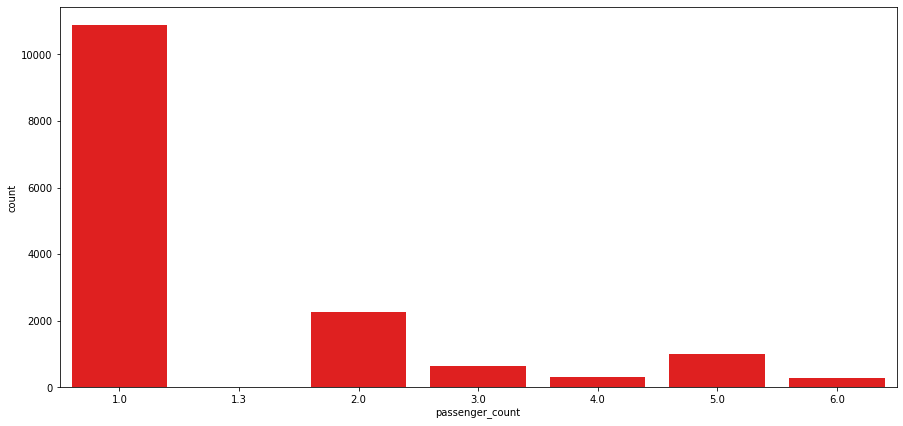

In [56]:
# Count plot on passenger count
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=train_cab, color='red')

1) Number of passanger affect the fare

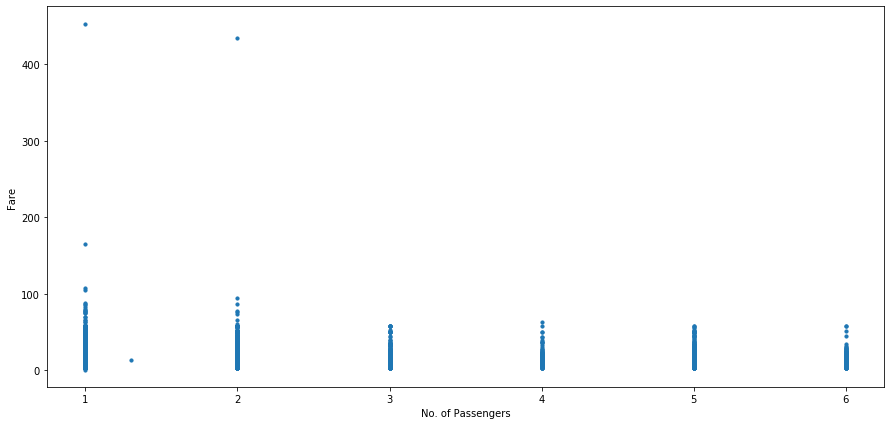

In [57]:
#Relationship beetween number of passengers and Fare

plt.figure(figsize=(15,7))
plt.scatter(x=train_cab['passenger_count'], y=train_cab['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()

##### By observing about visualization for varibale passanger_count we can conclude that:

1. single passanger have most hight frequency
2. also we can see single and double passanger gives us high fare amount.

#### 2] Relationship between Date and Fare

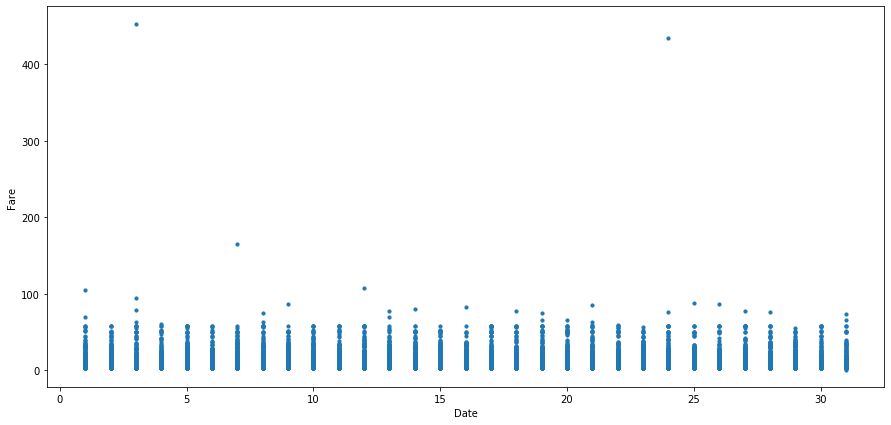

In [58]:
plt.figure(figsize=(15,7))
plt.scatter(x=train_cab['Date'], y=train_cab['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

#### 3] Lets observed Time varibale

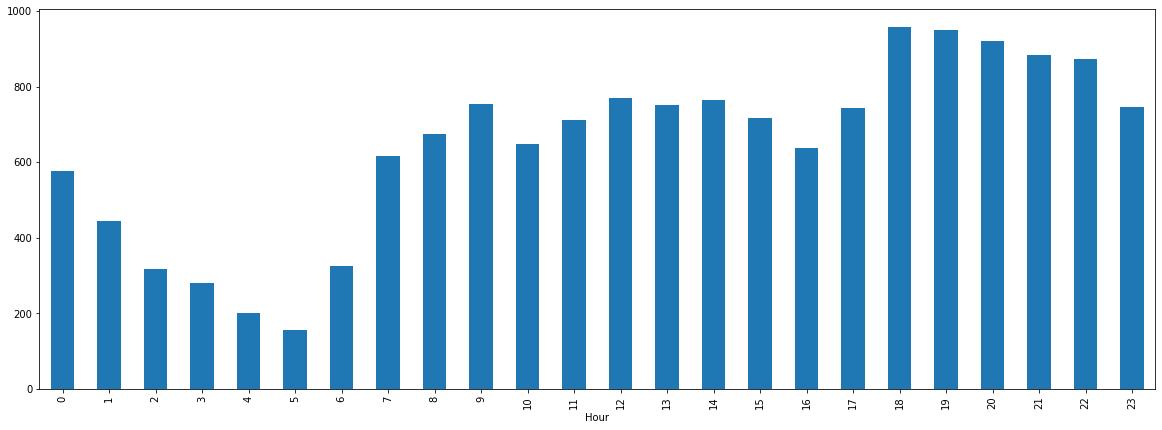

In [59]:
plt.figure(figsize=(20,7))
train_cab.groupby(train_cab["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

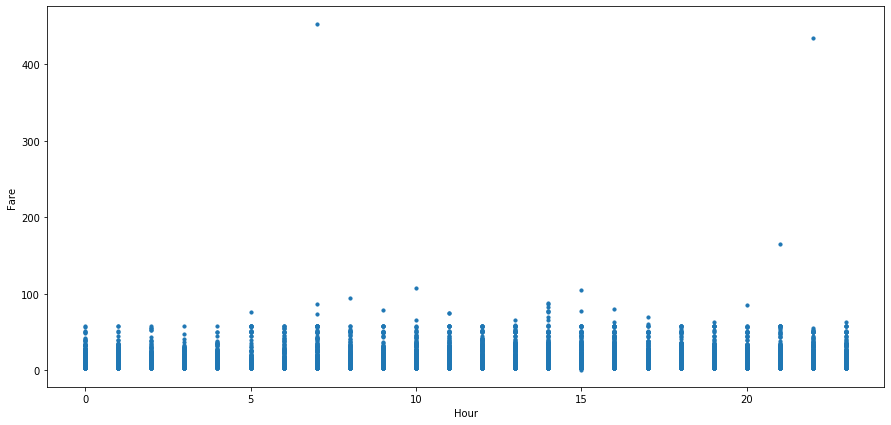

In [60]:
#Relationship between Time and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train_cab['Hour'], y=train_cab['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

##### Obseravtion we can colclude by considering time:
From the above plot We can say that the cabs taken at 7am and 23Pm are the costly. 
Hence we can assume that cabs taken early in morning and late at night are costliest.

#### 4] Observing day variable

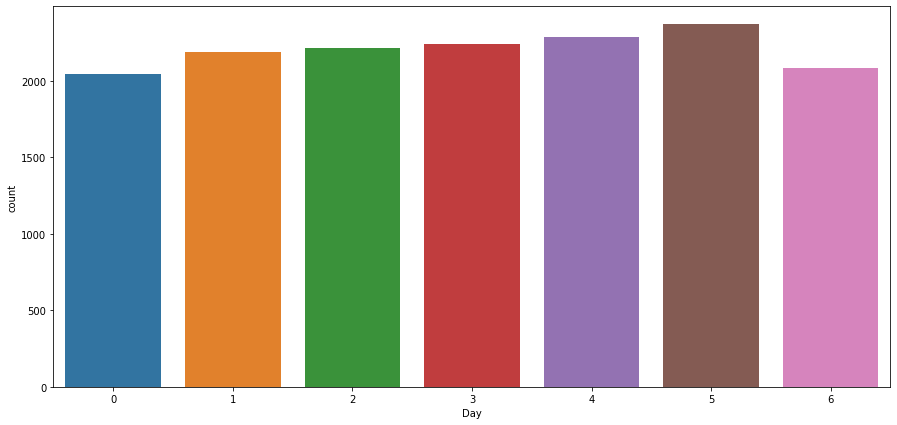

In [61]:
# #impact of Day on the number of cab rides
plt.figure(figsize=(15,7))
sns.countplot(x="Day", data=train_cab)

Observation: Days doest not have that much effects on cab ride

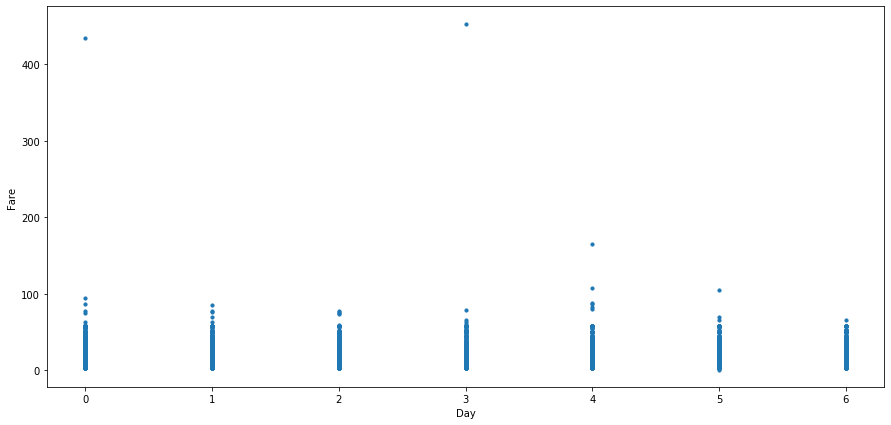

In [62]:
#Relationships between day and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train_cab['Day'], y=train_cab['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

##### Observation: 
The highest fares seem to be on a Sunday, Monday and Thursday, and the low on Wednesday and Saturday. May be due to low demand of the cabs on saturday the cab fare is low and high demand of cabs on sunday and monday shows the high fare prices

#### 5] Relationship between distance and fare

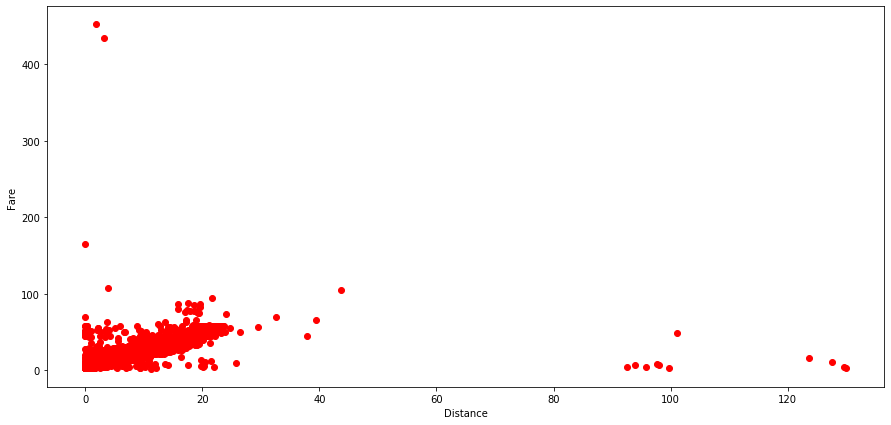

In [63]:
plt.figure(figsize=(15,7))
plt.scatter(x = train_cab['distance'],y = train_cab['fare_amount'],c = "r")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

##### Observation: Distance always effect cab fare

# 4] Feature Selection

1. We have splitted the pickup_datetime variable into different varaibles like month, year, day etc so now we dont need to have that pickup_Date variable now. Hence we can drop that, 
2. Also we have created distance varible using pickup and drop longitudes and latitudes so we will also drop pickup and drop longitudes and latitudes variables.

#### For train dataset

In [64]:
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude']
train_cab = train_cab.drop(drop, axis = 1)

In [65]:
train_cab.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009,6,15,0,17,1.030764
1,16.9,1.0,2010,1,5,1,16,8.450134
2,5.7,2.0,2011,8,18,3,0,1.389525
3,7.7,1.0,2012,4,21,5,4,2.799270
4,5.3,1.0,2010,3,9,1,7,1.999157


In [66]:
train_cab.shape

(15424, 8)

In [67]:
train_cab.dtypes

fare_amount        float64
passenger_count    float64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

#### For test dataset

In [68]:
drop_test = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
test_cab = test_cab.drop(drop_test, axis = 1)

In [69]:
test_cab.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [70]:
test_cab.shape

(9829, 7)

In [71]:
test_cab.dtypes

passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [72]:
#As in test daatset passanger_count data type is int64 and in train dataset we found passanger_cout type as float64
#so for avoiding any on mismatch further oprations we conver it into int64
train_cab['passenger_count'] = train_cab['passenger_count'].astype('int64')

In [73]:
train_cab.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [74]:
# So lets define numeric and categorical variables to find significant variables to build a model

# Storing continuous variables into an  object called cnames 

cnames = ['fare_amount', 'passenger_count','distance']

# Storing categorical variables into catnames object

catnames = ['year','Month', 'Date', 'Day', 'Hour']

In [75]:
##Correlation analysis
#Correlation plot

df_corr = train_cab.loc[:,cnames]

                 fare_amount  passenger_count  distance
fare_amount         1.000000         0.006495  0.609284
passenger_count     0.006495         1.000000 -0.003159
distance            0.609284        -0.003159  1.000000


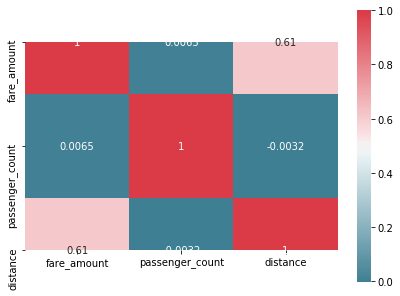

In [76]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

print(corr)# From correlation analysis we can say distance is significant variable to pass in to the model 

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

###### Observation on Correlation:
    There are some highly negative correlated vaue but it's important for our data analysis process so we consider this variables as less correlated and consider it for further model development.

In [77]:
# Anova Test is performed between catnames (categorical independent variables) & fare_amount(continuous target variable) 

import statsmodels.api as sm

from statsmodels.formula.api import ols

for i in catnames:
    mod = ols('fare_amount' + '~' + i, data = train_cab).fit()
    aov_table = sm.stats.anova_lm(mod, typ = 2)
    print(aov_table)
    
# From the anova result, we can observe Date ,weekday

# has p value > 0.05, so delete these variables not consider in model.

                sum_sq       df           F        PR(>F)
year      1.765442e+04      1.0  156.503813  9.795817e-36
Residual  1.739680e+06  15422.0         NaN           NaN
                sum_sq       df          F    PR(>F)
Month     2.393332e+03      1.0  21.032028  0.000005
Residual  1.754941e+06  15422.0        NaN       NaN
                sum_sq       df         F    PR(>F)
Date      1.051343e+02      1.0  0.922692  0.336784
Residual  1.757229e+06  15422.0       NaN       NaN
                sum_sq       df         F    PR(>F)
Day       6.935365e+00      1.0  0.060864  0.805139
Residual  1.757327e+06  15422.0       NaN       NaN
                sum_sq       df          F    PR(>F)
Hour      1.203834e+03      1.0  10.571838  0.001151
Residual  1.756130e+06  15422.0        NaN       NaN


In [78]:
# After correlation and ANOVA test we need to remove these variables 
# Cat variables day and date(which has p-value>0.05)

train_cab = train_cab.drop('Date', axis = 1)
train_cab = train_cab.drop('Day', axis = 1)


In [79]:
# Lets cross check shape of dataset after feature selection
train_cab.shape

(15424, 6)

In [80]:
#For matching training dataset variable to test dataset we will drop Date and Day variable from test data also.
test_cab = test_cab.drop('Date', axis = 1)
test_cab = test_cab.drop('Day', axis = 1)

# 6] Feature Scalling

fare_amount


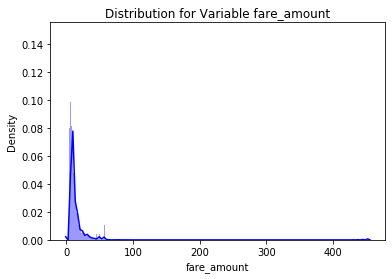

distance


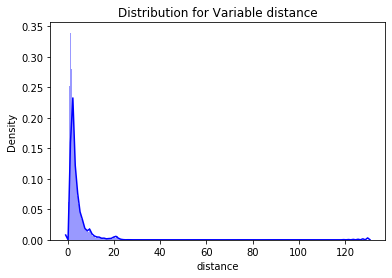

In [81]:
#Normality check of training data is uniformly distributed or not-

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train_cab[i],bins='auto',color='blue')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [82]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
train_cab['fare_amount'] = np.log1p(train_cab['fare_amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
train_cab['distance'] = np.log1p(train_cab['distance'])

fare_amount


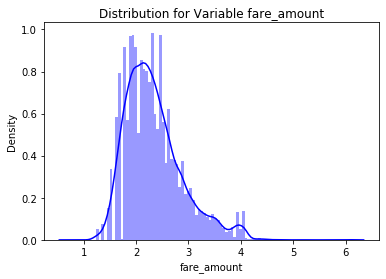

distance


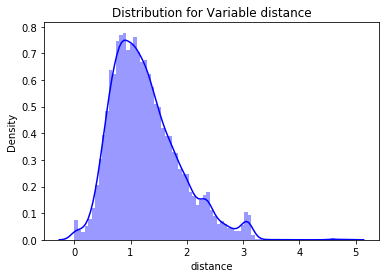

In [83]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train_cab[i],bins='auto',color='blue')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [84]:
#since skewness of distance variable is high, apply log transform to reduce the skewness-
test_cab['distance'] = np.log1p(test_cab['distance'])

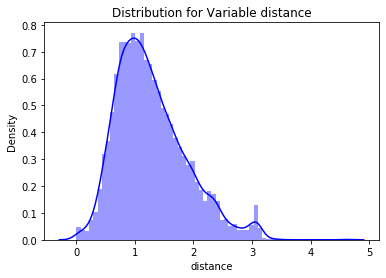

In [85]:
#rechecking the distribution for distance
sns.distplot(test_cab['distance'],bins='auto',color='blue')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

##### As we can see a bell shaped distribution. Hence our continous variables are now normally distributed, so we will not use any  Feature Scalling technique like Normalization or Standarization for our test data and train data.

# After all preprocessing our data is look like

In [86]:
train_cab.head()

,fare_amount,passenger_count,year,Month,Hour,distance
0,1.704748,1,2009,6,17,0.708412
1,2.884801,1,2010,1,16,2.246029
2,1.902108,2,2011,8,0,0.871095
3,2.163323,1,2012,4,4,1.334809
4,1.840550,1,2010,3,7,1.098331


In [87]:
test_cab.head()

,passenger_count,year,Month,Hour,distance
0,1,2015,1,13,1.200946
1,1,2015,1,13,1.231205
2,1,2011,10,11,0.481579
3,1,2012,12,21,1.085538
4,1,2012,12,21,1.854312


# After preprocessing we finally move towards Modelling our Data

As per observing on dataset we can conclude that our dataset is in continuous format. Our target variable has a integer value which is not refering to a classification or descrete class variable. 

Therefore, While applying modelling technique we choosed to go with regression modeling techniques which have task of predicting a continuous quantity :
#### We apply:
1. Linear Regression Model
2. Decision Tree regression Model
3. Random Forest Regression Model

In [88]:
# Lets Divide the data into train and test set 

x= train_cab.drop(['fare_amount'],axis=1)
y= train_cab['fare_amount']

In [89]:
# Now Split the data into train and test using train_test_split function
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=101)

In [90]:
print(X_train.shape)
print(X_test.shape)

(12339, 5)
(3085, 5)


##### As we have observed our data follows regression modelling, that's why for finding accuaracy we go with reggression mtrices.
There are 3 types of reggression matrix we have seen:
1. MAE (Mean Absolute Error)
2. MAPE (Mean Absolute Percentage Error)
3. RSME (Root squered Mean Error)

As RSME we use when we have time series type data. and MAPE we use when we just want percentage of deifference betweewn actual and predicted outcome.

##### So for our data we choose to go with MAPE matrix to find accuracy of model.

In [91]:
def MAPE(y_true,y_prediction):
    mape= np.mean(np.abs(y_true-y_prediction)/y_true)*100
    return mape

### 1. Linear Regression Model

In [92]:
# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)


In [93]:
#prediction on train data
pred_train_LR = fit_LR.predict(X_train)

In [94]:
#prediction on test data
pred_test_LR = fit_LR.predict(X_test)

In [95]:
MAPE(y_test, pred_test_LR)

7.812307256648075

In [96]:
#Accuracy on test data
#100-MAPE
100-7.812307256648075

92.18769274335193

In [97]:
MAPE(y_train, pred_train_LR)

7.479070473419111

In [98]:
#Accuracy on train data=
100-7.479070473419111

92.52092952658089

### 2. Decision Tree regression

In [99]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

In [100]:
#prediction on train data
pred_train_DT = fit_DT.predict(X_train)

#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

In [101]:
MAPE(y_train, pred_train_DT)

9.445229174410889

In [102]:
#Accuracy on train data=
100-9.445229174410755

90.55477082558924

In [103]:
MAPE(y_test, pred_test_DT)

9.723944002791203

In [104]:
#acuuracy For test data=
100-9.723944002791209

90.27605599720879

### 3. Random Forest Regression Model

In [105]:
fit_RF = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)

In [106]:
#prediction on train data
pred_train_RF = fit_RF.predict(X_train)
#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

In [107]:
MAPE(y_test, pred_test_RF)

7.825382636148265

In [119]:
#Test accuraccy=
100-7.825382636148265

92.17461736385174

In [109]:
MAPE(y_train, pred_train_RF)

2.8053921901547905

In [118]:
#Train Accuracy=
100-2.8053921901547905

97.19460780984521

# 8] Create predicted fare amount varibale in our test dataset

As per observation on above implementation of model we can conclude that random forest is best match for our dataset. so we chhose this model for predecting a amount.

In [111]:
#test_cab.to_csv("new_test.csv")

In [112]:
#newtest_cab=pd.read_csv("new_test.csv")

In [113]:
test_cab

,passenger_count,year,Month,Hour,distance
0,1,2015,1,13,1.200946
1,1,2015,1,13,1.231205
2,1,2011,10,11,0.481579
3,1,2012,12,21,1.085538
4,1,2012,12,21,1.854312
...,...,...,...,...,...
9909,6,2015,5,12,1.139394
9910,6,2015,1,17,1.451841
9911,6,2015,4,20,3.004887
9912,6,2015,1,1,2.234679


In [114]:
Predictions_Cab_test=fit_RF.predict(test_cab)

In [115]:
Predictions_Cab_test

array([2.52964543, 2.61696154, 1.73148558, ..., 3.93001566, 3.17897913,
       2.14264789])

In [116]:
test_cab['Fare_amount']=Predictions_Cab_test

In [117]:
test_cab.head(10)

,passenger_count,year,Month,Hour,distance,Fare_amount
0,1,2015,1,13,1.200946,2.529645
1,1,2015,1,13,1.231205,2.616962
2,1,2011,10,11,0.481579,1.731486
3,1,2012,12,21,1.085538,2.281943
4,1,2012,12,21,1.854312,2.923278
5,1,2012,12,21,1.440439,2.414337
6,1,2011,10,12,0.657313,1.882687
7,1,2011,10,12,3.115296,3.931774
8,1,2011,10,12,1.583907,2.574777
9,1,2014,2,15,0.741839,1.914068
